# This is an ipython notebook providing an example of DBSCAN clustering for wholesale dataset using scikit-learn
## Importing the libraries

In [22]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
 
%pylab inline
sns.set()
 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


In [23]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
data = pd.read_csv("./wholesale.csv")
print(data.head())
data.drop(["Channel", "Region"], axis = 1, inplace = True)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [25]:
data = data[["Grocery", "Milk"]]
data = data.as_matrix().astype("float32", copy = False)

In [26]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

## Plotting the scatterplot for the data

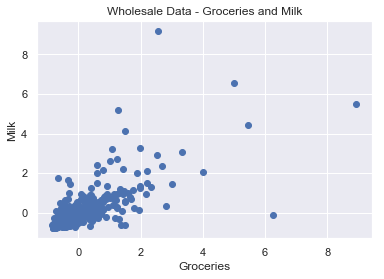

In [27]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.title("Wholesale Data - Groceries and Milk")
plt.savefig("./wholesale.png", format = "PNG")

## Run the DBSCAN clustering from sklearn 

In [28]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)


labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True



## Plot the DBSCAN results

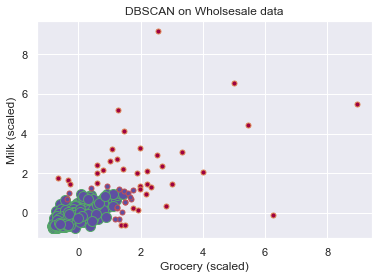

In [19]:

unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
 
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = data[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
    
plt.title("DBSCAN on Wholsesale data")
plt.xlabel("Grocery (scaled)")
plt.ylabel("Milk (scaled)")
plt.savefig("./dbscan_wholesale.png", format = "PNG")